<a href="https://colab.research.google.com/github/odevhesabi1/Odevler/blob/main/A_04_DataCleaningOutliers_tr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bu ödevde [ABD Eğitim Sistemi](https://www.kaggle.com/noriuk/us-education-datasets-unification-project/home)'ne ait verileri inceleyemeye devam edeceksiniz. Bu veri kümesinde eyalet bazında yıllık bir çok veri bulunmaktadır. Bu verilerin açıklamalarına yine Kaggle'dan ulaşabilirsiniz. 

Bu ödevi tamamlamak için, aşağıdaki soruların çözümlerini içeren Jupyter notebook dosyasının Github linkini gönderin. Kafanıza takılan konuları mentörünüzle konuşabilir ya da ofis saatinde Slack üzerinden sorabilirsiniz.

Öncelikle bir önceki derste uyguladağınız eksik değerleri tamamlama tekniklerinden en uygun olanını uygulayın. Aşağıdaki sorulara cevap verebilmeniz için eksik verilerin üstesinden gelmelisiniz.

1. Toplam gelir verilerini içeren *TOTAL_REVENUE* ve toplam harcama verilerini içeren *TOTAL_EXPENDITURE* değişkenlerini inceleyin. Bu değişkenler aykırı değerler içeriyor mu?

2. Toplam gelir (*TOTAL_REVENUE*) ve toplam harcama (*TOTAL_EXPENDITURE*) değişkenlerinde aykırı değer tespit ettiyseniz bu derste öğrendiğiniz teknikleri uygulayarak bu aykırı değerleri ortadan kaldırın ve bunu yaptıktan sonra hiçbir aykırı değer kalmadığını doğrulayın.

3. Toplam gelir (*TOTAL_REVENUE*) değişkeninden, toplam harcama (*TOTAL_EXPENDITURE*) değerini çıkartarak bütçe açığı olarak düşünülebilecek bir değişken oluşturun (aykırı değerleri temezlemeden). Bu yeni değişkende de aykırı değerler yer almakta mı? Varsa bu aykırı değerleri de temizleyin.

4. Yine toplam gelir (*TOTAL_REVENUE*) değişkeninden, toplam harcama(*TOTAL_EXPENDITURE*) değerini çıkartarak bütçe açığı olarak düşünülebilecek bir değişken oluşturun. Fakat bu sefer aykırı değerleri temezledikten sonra bu işlemi yapın. Bu yeni değişkende  de aykırı değerler var mı? Varsa bunları da temizlemekte fayda var.

5. Şimdi elimizde üçüncü ve ve dördüncü sorularda oluşturduğumuz iki farklı bütçe değişkeni var. Bu ikisi arasında fark görüyor musunuz? 

6. Bizim için bütçe açığı çok önemli bir değişken olsaydı aykırı değerleri temizlemek için hangi yöntem daha iyi olurdu. Üçüncü soruda uguladığınız yöntem mi yoksa dördüncü sorudaki yöntem mi? 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv("states_all.csv")
df[:3]

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,735036.0,NaN,174053.0,8224.0,55460.0,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,350902.0,NaN,37451.0,2371.0,10152.0,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,1007732.0,NaN,609114.0,2544.0,53497.0,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1715 entries, 0 to 1714
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PRIMARY_KEY                   1715 non-null   object 
 1   STATE                         1715 non-null   object 
 2   YEAR                          1715 non-null   int64  
 3   ENROLL                        1224 non-null   float64
 4   TOTAL_REVENUE                 1275 non-null   float64
 5   FEDERAL_REVENUE               1275 non-null   float64
 6   STATE_REVENUE                 1275 non-null   float64
 7   LOCAL_REVENUE                 1275 non-null   float64
 8   TOTAL_EXPENDITURE             1275 non-null   float64
 9   INSTRUCTION_EXPENDITURE       1275 non-null   float64
 10  SUPPORT_SERVICES_EXPENDITURE  1275 non-null   float64
 11  OTHER_EXPENDITURE             1224 non-null   float64
 12  CAPITAL_OUTLAY_EXPENDITURE    1275 non-null   float64
 13  GRA

In [3]:
df.TOTAL_REVENUE.unique()

array([ 2678885.,  1049591.,  3258079., ..., 11697466.,  2044669.,
             nan])

In [4]:
for sutun_adi in ["TOTAL_REVENUE", "TOTAL_EXPENDITURE"]:
    print("{} sütunu için problemli değerler : ".format(sutun_adi))
    hatali_degerler = []
    for deger in df[sutun_adi]:
        try:
            float(deger)
        except:
            hatali_degerler.append(deger)
    print(set(hatali_degerler))

TOTAL_REVENUE sütunu için problemli değerler : 
set()
TOTAL_EXPENDITURE sütunu için problemli değerler : 
set()


In [5]:
states = list(df.STATE.unique())
states

for element in states:
  df["TOTAL_REVENUE"].fillna(df[df.STATE == element].TOTAL_REVENUE.mean(), inplace=True)

for element in states:
  df["TOTAL_EXPENDITURE"].fillna(df[df.STATE == element].TOTAL_EXPENDITURE.mean(), inplace=True)

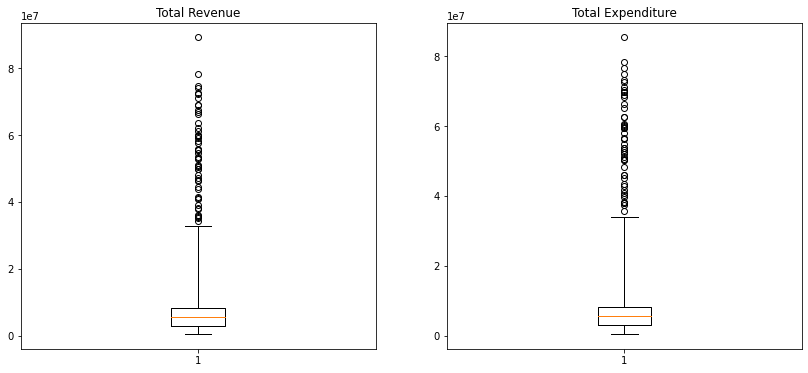

In [6]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.boxplot(df.TOTAL_REVENUE, whis=5)
plt.title("Total Revenue")


plt.subplot(1,2,2)
plt.boxplot(df.TOTAL_EXPENDITURE, whis=5)
plt.title("Total Expenditure")
plt.show()

#Grafiğe göre yorum yaparsak çok fazla outliner veri var gibi. Boxplottan outliner incelemek gerçekten pek fikir vermiyor.
#İncelediğimiz değişkenler eyaletten eyalete gerçekten büyük farklar gösterebilir. Bir eyalet diğerlerine göre müthiş bir
#gelire sahip olabilir aslında ve bu da grafikte outliner olarak görülebilir.

# Amacımız 3. ve 4. çeyrek çizgisi arasını çok uzun tutmadan, aykırı değerlerin bazılarını uygun yöntemle; örneğin winsorize ile
#veriden kaldırarak belirttiğim gibi bir grafik mi elde etmektir ? Ama bu aykırı gibi görünen değerler aslında oldukça anlamlı 
#olamaz mı ? Sırf aykırı gibi görünen değerlerden kurtulmak adına verinin gerçekliğini bozabilirim, bu da ileride modelimin başa-
#rısızlığına neden olmaz mı ?

#Bu iki kolonun aykırı değer içerip içermediğinden emin olamadım. Sadece teknikleri uygulamak adına aykırı değer ile baş etme
#yöntemlerini aşağıdaki satırlarda uygulamaya devam edeceğim.

(array([1.348e+03, 2.020e+02, 8.400e+01, 3.500e+01, 9.000e+00, 1.200e+01,
        1.200e+01, 7.000e+00, 5.000e+00, 1.000e+00]),
 array([  465650.        ,  9340811.2       , 18215972.4       ,
        27091133.6       , 35966294.8       , 44841456.        ,
        53716617.2       , 62591778.39999999, 71466939.6       ,
        80342100.8       , 89217262.        ]),
 <a list of 10 Patch objects>)

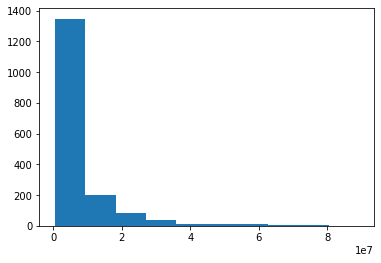

In [7]:
plt.hist(df.TOTAL_REVENUE)

##Histogram grafiğindeki x eksenindeki değerler benim total_revenue değerlerim olması gerekmiyor muydu. Grafikteki X ve Y değerleri ne total_revenue değerlerimden biri ,
#ne de o değerlerin kaç defa tekrarladığını görüyor. Grafikten bunları vermesini bekliyordum, verdiği değerlerin ne olduğu konusunda kafam karıştı.

#revenue kolonundaki unique değerleri hist grafiğinde göremedim mesela.


In [8]:
df[df.STATE == "ALABAMA"].TOTAL_REVENUE.unique()

array([2678885.  , 2827391.  , 2970223.  , 3367437.  , 3365113.  ,
       3981788.  , 4140537.  , 4471546.  , 4885917.  , 4832946.  ,
       5128559.  , 5196054.  , 5356113.  , 5889966.  , 6364028.  ,
       7069040.  , 7726213.  , 7186390.  , 7281058.  , 7376725.  ,
       7136949.  , 7197439.  , 7357267.  , 7360222.  , 7498567.  ,
       5545854.92])

In [83]:
#z-score ile aykırı değerleri inceleyebiliriz.
#z-score kullanırken eşik değer ne vermek gerektiğinden emin değilim. İlgilendiğimiz değişkenin değerlerinden birini vermemiz gerektiğini düşünmüştüm.
#ancak z-score konu anlatımında 1,2,3 gibi eşik değerler kullandık. Bende aşağıda öyle yapıyorum.

from scipy.stats import zscore


for elements in ["TOTAL_REVENUE", "TOTAL_EXPENDITURE"]:

  z_scores = zscore(df[elements])


  for threshold in range(1,5):
    print("Eşik değeri: {}".format(threshold))
    print("{} için Aykırı değerlerin sayısı: {}".format(elements, len((np.where(z_scores > threshold)[0]))))
    print('------')



Eşik değeri: 1
TOTAL_REVENUE için Aykırı değerlerin sayısı: 164
------
Eşik değeri: 2
TOTAL_REVENUE için Aykırı değerlerin sayısı: 70
------
Eşik değeri: 3
TOTAL_REVENUE için Aykırı değerlerin sayısı: 43
------
Eşik değeri: 4
TOTAL_REVENUE için Aykırı değerlerin sayısı: 33
------
Eşik değeri: 1
TOTAL_EXPENDITURE için Aykırı değerlerin sayısı: 159
------
Eşik değeri: 2
TOTAL_EXPENDITURE için Aykırı değerlerin sayısı: 67
------
Eşik değeri: 3
TOTAL_EXPENDITURE için Aykırı değerlerin sayısı: 44
------
Eşik değeri: 4
TOTAL_EXPENDITURE için Aykırı değerlerin sayısı: 35
------


In [85]:
# Tukkey'in yöntemi - TOTAL REVENUE



q75, q25= np.percentile(df.TOTAL_REVENUE, [75,25])
caa = q75-q25

esik_degerleri1 = pd.DataFrame()

for esik_degeri in np.arange(1,5,0.5):
    min_deger = q25 - (caa*esik_degeri)
    maks_deger = q75 + (caa*esik_degeri)
    aykiri_deger_sayisi = len((np.where((df.TOTAL_REVENUE > maks_deger)| 
                                       (df.TOTAL_REVENUE < min_deger))[0]))
    
    esik_degerleri1 = esik_degerleri1.append({'esik_degeri': esik_degeri,'aykiri_deger_sayısı': aykiri_deger_sayisi}, 
                                           ignore_index=True)
esik_degerleri1

,aykiri_deger_sayısı,esik_degeri
0,246.0,1.0
1,195.0,1.5
2,161.0,2.0
3,132.0,2.5
4,111.0,3.0
5,90.0,3.5
6,70.0,4.0
7,54.0,4.5


In [86]:
#Tukkey for Total_Expenditure

q75, q25= np.percentile(df.TOTAL_EXPENDITURE, [75,25])
caa = q75-q25

esik_degerleri2 = pd.DataFrame()

for esik_degeri in np.arange(1,5,0.5):
    min_deger = q25 - (caa*esik_degeri)
    maks_deger = q75 + (caa*esik_degeri)
    aykiri_deger_sayisi = len((np.where((df.TOTAL_EXPENDITURE > maks_deger)| 
                                       (df.TOTAL_EXPENDITURE < min_deger))[0]))
    
    esik_degerleri2 = esik_degerleri2.append({'esik_degeri': esik_degeri,'aykiri_deger_sayısı': aykiri_deger_sayisi}, 
                                           ignore_index=True)
esik_degerleri2
  

,aykiri_deger_sayısı,esik_degeri
0,246.0,1.0
1,195.0,1.5
2,160.0,2.0
3,134.0,2.5
4,109.0,3.0
5,95.0,3.5
6,67.0,4.0
7,56.0,4.5


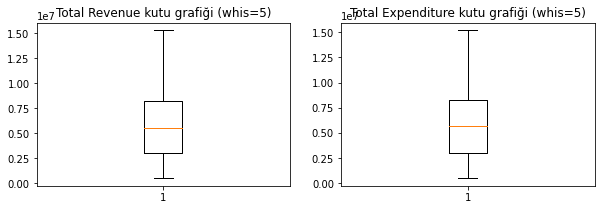

In [70]:
#Winsorise yöntemi ile aykırı değerlerden kurtulmayı tercih ediyorum. Tek yönlü aykırılık olduğundan sadece yukarı yön için parametreye değer veriyorum.


from scipy.stats.mstats import winsorize

winsorize_revenue = winsorize(df.TOTAL_REVENUE, (0, 0.12))


winsorize_expenditure = winsorize(df.TOTAL_EXPENDITURE, (0, 0.12))

plt.figure(figsize=(10,3))

plt.subplot(1,2,1)
plt.boxplot(winsorize_revenue)
plt.title("Total Revenue kutu grafiği (whis=5)")

plt.subplot(1,2,2)
plt.boxplot(winsorize_expenditure)
plt.title("Total Expenditure kutu grafiği (whis=5)")
plt.show()

In [87]:
q75, q25= np.percentile(winsorize_revenue, [75,25])
caa = q75-q25

esik_degerleri3 = pd.DataFrame()

for esik_degeri in np.arange(1,5,0.5):
    min_deger = q25 - (caa*esik_degeri)
    maks_deger = q75 + (caa*esik_degeri)
    aykiri_deger_sayisi = len((np.where((winsorize_revenue > maks_deger)| 
                                       (winsorize_revenue < min_deger))[0]))
    
    esik_degerleri3 = esik_degerleri3.append({'esik_degeri': esik_degeri,'aykiri_deger_sayısı': aykiri_deger_sayisi}, 
                                           ignore_index=True)

esik_degerleri3

,aykiri_deger_sayısı,esik_degeri
0,246.0,1.0
1,0.0,1.5
2,0.0,2.0
3,0.0,2.5
4,0.0,3.0
5,0.0,3.5
6,0.0,4.0
7,0.0,4.5


In [88]:
q75, q25= np.percentile(winsorize_expenditure, [75,25])
caa = q75-q25

esik_degerleri4 = pd.DataFrame()

for esik_degeri in np.arange(1,5,0.5):
    min_deger = q25 - (caa*esik_degeri)
    maks_deger = q75 + (caa*esik_degeri)
    aykiri_deger_sayisi = len((np.where((winsorize_expenditure > maks_deger)| 
                                       (winsorize_expenditure < min_deger))[0]))
    
    esik_degerleri4 = esik_degerleri4.append({'esik_degeri': esik_degeri,'aykiri_deger_sayısı': aykiri_deger_sayisi}, 
                                           ignore_index=True)

esik_degerleri4

,aykiri_deger_sayısı,esik_degeri
0,246.0,1.0
1,0.0,1.5
2,0.0,2.0
3,0.0,2.5
4,0.0,3.0
5,0.0,3.5
6,0.0,4.0
7,0.0,4.5


In [118]:
##Toplam gelir (TOTAL_REVENUE) değişkeninden, toplam harcama (TOTAL_EXPENDITURE) değerini çıkartarak bütçe açığı olarak düşünülebilecek bir değişken oluşturun (aykırı değerleri temezlemeden).
##Bu yeni değişkende de aykırı değerler yer almakta mı? Varsa bu aykırı değerleri de temizleyin.

df["DIFFERENCE"]= df.TOTAL_REVENUE - df.TOTAL_EXPENDITURE

#Tukkey ile aykırı değerlerin incelenmesi

esik_degerleri5 = pd.DataFrame()

q75, q25 = np.percentile(df.DIFFERENCE, [75,25])
caa = q75-q25

for esik_degeri in np.arange(1,5,0.5):
  min_deger = q25 - (caa*esik_degeri)
  max_deger = q75 + (caa*esik_degeri)

  aykırı_deger_sayısı = len((np.where((df.DIFFERENCE > max_deger) |
                        (df.DIFFERENCE < min_deger))[0]))
  
  esik_degerleri5 = esik_degerleri5.append({"esik_degeri": esik_degeri, "aykırı_deger_sayısı" : aykırı_deger_sayısı}, ignore_index=True)
esik_degerleri5




,aykırı_deger_sayısı,esik_degeri
0,364.0,1.0
1,274.0,1.5
2,237.0,2.0
3,186.0,2.5
4,152.0,3.0
5,126.0,3.5
6,111.0,4.0
7,99.0,4.5


Text(0.5, 1.0, 'Difference Boxplot (whis=5)')

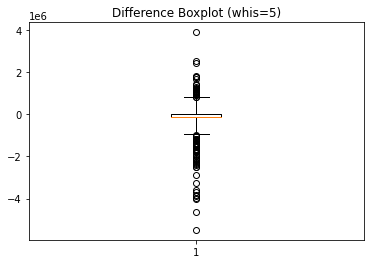

In [101]:
plt.boxplot(df.DIFFERENCE, whis=5)
plt.title("Difference Boxplot (whis=5)")

Text(0.5, 1.0, 'Differnce kutu grafiği (whis=5)')

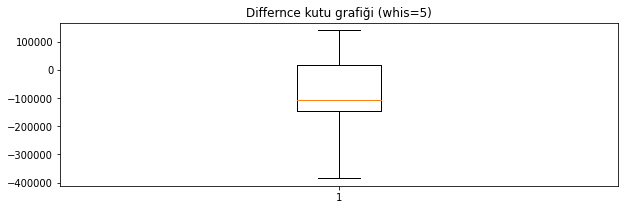

In [114]:
#aykırı değerleri temizlemek için winsorize uygulandı. Aykırı değerler 2 yönlü olduğu için winsorize iki yönlü uygulandı.

winsorize_difference = winsorize(df.DIFFERENCE, (0.09, 0.12))

plt.figure(figsize=(10,3))

plt.boxplot(winsorize_difference)
plt.title("Differnce kutu grafiği (whis=5)")


In [116]:
#Tukkey ile winsorize uygulanmış aykırı değerlerin incelenmesi

esik_degerleri6 = pd.DataFrame()

q75, q25 = np.percentile(winsorize_difference, [75,25])
caa = q75-q25

for esik_degeri in np.arange(1,5,0.5):
  min_deger = q25 - (caa*esik_degeri)
  max_deger = q75 + (caa*esik_degeri)

  aykırı_deger_sayısı = len((np.where((winsorize_difference > max_deger) |
                        (winsorize_difference < min_deger))[0]))
  
  esik_degerleri6 = esik_degerleri6.append({"esik_degeri": esik_degeri, "aykırı_deger_sayısı" : aykırı_deger_sayısı}, ignore_index=True)
esik_degerleri6


,aykırı_deger_sayısı,esik_degeri
0,195.0,1.0
1,0.0,1.5
2,0.0,2.0
3,0.0,2.5
4,0.0,3.0
5,0.0,3.5
6,0.0,4.0
7,0.0,4.5


{'boxes': [<matplotlib.lines.Line2D at 0x7f1a00b772d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f1a01176c50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f1a01154750>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f1a010bbad0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f1a01176ed0>,
  <matplotlib.lines.Line2D at 0x7f1a011764d0>]}

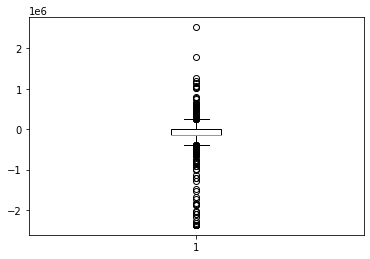

In [120]:
##Yine toplam gelir (TOTAL_REVENUE) değişkeninden, toplam harcama(TOTAL_EXPENDITURE) değerini çıkartarak bütçe açığı olarak düşünülebilecek bir değişken oluşturun. 
#Fakat bu sefer aykırı değerleri temezledikten sonra bu işlemi yapın. Bu yeni değişkende de aykırı değerler var mı?
# Varsa bunları da temizlemekte fayda var.

df["DIFFERENCE_CLEANED"] = winsorize_revenue - winsorive_expenditure

plt.boxplot(df.DIFFERENCE_CLEANED) # Temizlenmiş aykırı değerler ile yeni kolon olusturuldugunda yine aykırı değerlerin olduğu görülüyor.


{'boxes': [<matplotlib.lines.Line2D at 0x7f1a00935cd0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f1a008bbcd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f1a008c2d10>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f1a008c27d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f1a008bb250>,
  <matplotlib.lines.Line2D at 0x7f1a008bb790>]}

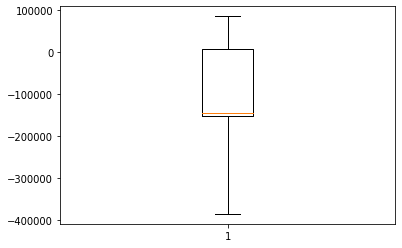

In [129]:
winsorize_difference_cleaned = winsorize (df.DIFFERENCE_CLEANED, (0.15,0.12))

plt.boxplot(winsorize_difference_cleaned) # 3. soruda kullanılan aynı winsorize parametreleri kullanıldığında hala aykırı değerler olduğu görülüyor
#aşağı yönlü değer için 0.09 yerine 0.15 kullanıldı


In [131]:
## Tukkey ile winsorize edilmiş aykırı değerlerin sayısının tespiti

esik_degerleri7 = pd.DataFrame()

q75, q25 = np.percentile(winsorize_difference_cleaned, [75,25])
caa = q75-q25

for esik_degeri in np.arange(1,5,0.5):
  min_deger = q25 - (caa*esik_degeri)
  max_deger = q75 + (caa*esik_degeri)

  aykırı_deger_sayısı = len((np.where((winsorize_difference_cleaned > max_deger) |
                        (winsorize_difference_cleaned < min_deger))[0]))
  
  esik_degerleri7 = esik_degerleri7.append({"esik_degeri": esik_degeri, "aykırı_deger_sayısı" : aykırı_deger_sayısı}, ignore_index=True)
esik_degerleri7

,aykırı_deger_sayısı,esik_degeri
0,288.0,1.0
1,0.0,1.5
2,0.0,2.0
3,0.0,2.5
4,0.0,3.0
5,0.0,3.5
6,0.0,4.0
7,0.0,4.5


In [ ]:
#5-Şimdi elimizde üçüncü ve ve dördüncü sorularda oluşturduğumuz iki farklı bütçe değişkeni var. Bu ikisi arasında fark görüyor musunuz?

#Daha önce aykırı değerleri temizlenmiş feature'lardan yeni feature oluşturulduğuna daha az aykırı değerin temizlenebildiği görülmüştür.


In [ ]:
# 6 - Bizim için bütçe açığı çok önemli bir değişken olsaydı aykırı değerleri temizlemek için hangi yöntem daha iyi olurdu.
# Üçüncü soruda uguladığınız yöntem mi yoksa dördüncü sorudaki yöntem mi?

#CEVAP:3. sorudaki yöntem ile daha az aykırı değerin oluştuğu görülmüştür. 3. Sorudaki yöntemi tercih ederdim.